# Лабораторная работа № 3

## Голубинов Владислав 18-АС

Face Detector: OpenCV haar cascade

Face recognition model: OpenFace


In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py
!pip install deepface

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the noteboo

!cp /content/drive/MyDrive/Colab\ models/openface_weights.h5 /root/.deepface/weights/openface_weights.h5

--2020-11-29 17:50:47--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2020-11-29 17:50:48 (13.1 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2020-11-29 17:50:48--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.13

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='test.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      div.style.display= "none";
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
def detect_face_crop(base_image):
  gray = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  face_crop = []
  for (x,y,w,h) in faces:
    face_crop.append(base_image[y:y+h, x:x+w])
  return face_crop

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

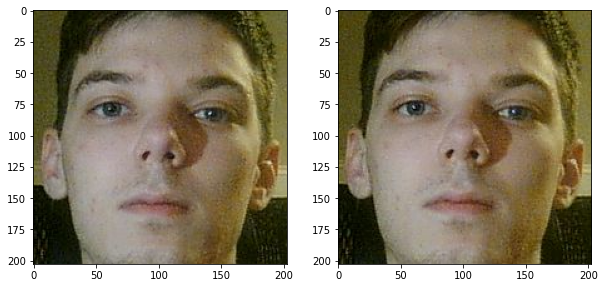

In [ ]:
from keras.preprocessing.image import load_img
import os

plt.figure(figsize=[10,10])

try:
  i = 0
  while True:
    imgname = 'face' + str(i) + '.jpg'
    plt.subplot(1, 2, i+1)
    filename = take_photo(imgname)
    img = cv2.imread(filename)
    crop = detect_face_crop(img)
    if len(crop) != 0:
      plt.imshow(cv2.cvtColor(crop[0], cv2.COLOR_BGR2RGB))
      i += 1
    if i == 2:
      break
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from deepface import DeepFace
result = DeepFace.verify("/content/face0.jpg", "/content/face1.jpg", model_name = "OpenFace", enforce_detection = False)
result

Using OpenFace model backend cosine distance.


{'distance': 0.02788722515106201,
 'max_threshold_to_verify': 0.1,
 'model': 'OpenFace',
 'similarity_metric': 'cosine',
 'verified': True}